# 03-Requirements Modeling

## 03-01 Occurrences and Constraints
- Process of defining requirements in context of a problem or opportunity
- Eg.
    - Business problem > Stakeholder requirements > System requirements

**Occurrence**
- Represents an instance or execution of systems behavior in time (and space)
- Existence in time > lifetime
- Eg.
    - Model: oven
    - Occurrence: cooking in an oven
        - *Execution of the oven's behavior*
    - Occurrence lifetime has time slices representing periods or phases
        - Preheat
        - Cook
        - Cool
        - Clean
- Have definitions and usages

### OccurrenceDefinition_1.sysml
- Timeslices have rounded corners therefore, usages of the occurence

In [56]:
package OccurrenceDefinition_1{
    occurrence def Cooking {
        timeslice preheat;
        timeslice cook;
        timeslice cool;
        timeslice clean;
    }
}

Package OccurrenceDefinition_1 (708b6b1e-f2f0-4b84-b2bc-40cd9ca363a5)


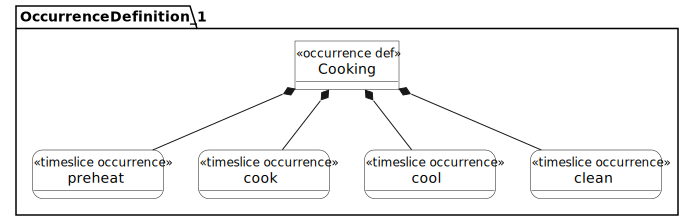

In [57]:
%viz --view=default OccurrenceDefinition_1

### NestedOccurrences_1.sysml
- Could also be defined as individual occurrences then nested as timeslices

In [58]:
package NestedOccurrences_1{
    occurrence def Cooking{
        occurrence def Preheat;
        occurrence def Cook;
        occurrence def Cool;
        occurrence def Clean;
    }
}

Package NestedOccurrences_1 (108dde19-5b49-4e86-aedf-e7d72a60ed1d)


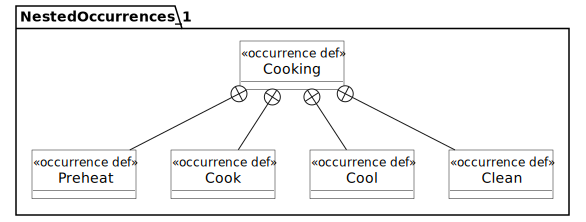

In [59]:
%viz --view=default NestedOccurrences_1

### NestedOccurrences_2.sysml
Occurrences work best in packages so we can import them into the usage

In [60]:
package CookingDefs{
    occurrence def Cooking{
        occurrence def Preheat;
        occurrence def Cook;
        occurrence def Cool;
        occurrence def Clean;
    }
}

Package CookingDefs (b7b6778c-de44-42d0-a7f7-092e8fa7a68e)


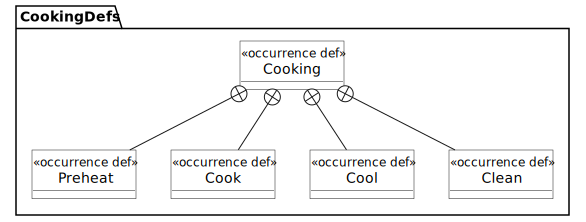

In [61]:
%viz --view=default CookingDefs

### OccurrenceUsage_1.sysml
- Timeslices can be selectively chosen per occurrence usage

In [62]:
package OccurrenceUsage_1{
    private import CookingDefs::*;

    occurrence testCooking: Cooking{
        timeslice preheat: Preheat;
        timeslice cook: Cook;
        timeslice cool: Cool;
    }
}

Package OccurrenceUsage_1 (8a79f30d-6460-420b-b167-9f060c5a7a16)


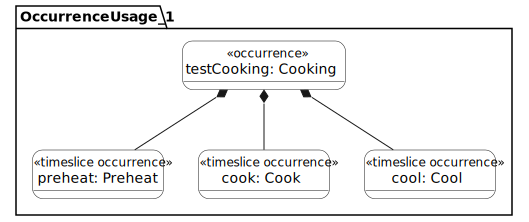

In [63]:
%viz --view=default OccurrenceUsage_1

### OccurrenceUsage_2.sysml

In [64]:
package OvenDefs{
    private import SI::*;
    private import ScalarValues::Integer;

    part def Rack;
    part def Drawer{
        part extraRack: Rack;
    }
    part def HeatingElement{
        attribute temperature: TemperatureDifferenceUnit;
    }
    part def Oven{
        attribute wattage: PowerUnit;
        attribute slotCount: Integer;
        part rack: Rack;
        part drawer: Drawer;
        part heatingElement: HeatingElement;
    }
}

Package OvenDefs (9d156f50-7e35-4452-9725-47af9a85e811)


In [65]:
package OccurrenceUsage_2{
    private import CookingDefs::*;
    private import OvenDefs::*;

    occurrence testCooking: Cooking{
        timeslice preheat: Preheat;
        timeslice cook: Cook;
        timeslice cool: Cool;

        ref part newOven: Oven;
    }
}

Package OccurrenceUsage_2 (61ab2b71-b283-488b-8b5d-ab8f7c8fe9fb)


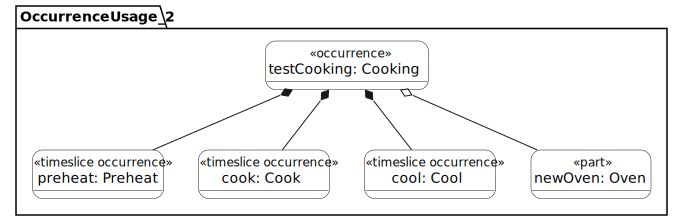

In [66]:
%viz --view=default OccurrenceUsage_2

### ItemDefinition.sysml
**Item**
- Kind of occurrence representing a class of objects that may be acted on over time but do not necessarily perform actions themselves
    - Eg: Gas flows through a motor but is not actually part of it
- Necessary to connect parts to occurrences
    - All parts are items, not all items are parts

In [67]:
package ItemDefinition{
    item def ElectricPower;

    part def Oven{
        item power: ElectricPower;
        // Electricity or gas flow through the oven but are not actually part of the oven
    }
}

Package ItemDefinition (41edd6a9-aca5-4928-b4bc-4123a22af7c8)


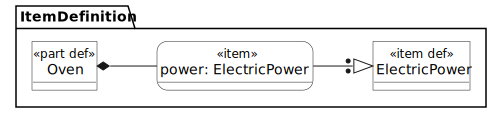

In [68]:
%viz --view=default --style=LR ItemDefinition

### ConstraintDefinition.sysml
**Constraint**
- Occurrence defining a logical predicate (logic statement)
- Condition for occurrence to happen
- Eg.
    - Model: Oven
    - Constraint for cooking occurrence
        - Temperature > 260ºC (500ºF, 533 K)
            - If true: CookingOccurrence
- Visually, constraint definition includes logical predicate as operator expression with reference arrow connecting part definition to constraint definition

In [69]:
package ConstraintDefinition{
    private import SI::*;

    part def Oven{
        attribute temperature: TemperatureDifferenceUnit;
        // TemperatureDifferenceUnit is defined in SI Library
    }

    constraint def CookingTemperature{
        testOven: Oven;
        testOven.temperature == 533 [K]
        // Square bracket notes that unit is defined in library used for attribute
    }
}

Package ConstraintDefinition (bbf1dffb-db93-45ae-8687-f7e474dbbd95)


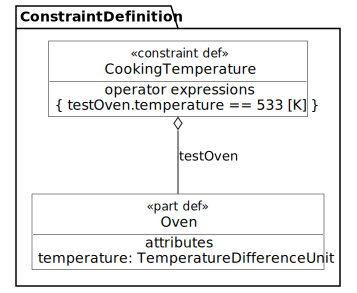

In [70]:
%viz --view=default ConstraintDefinition

## 03-02 Requirement

### RequirementConstraint.sysml
**Requirement**
- Represents constraints a solution must satisfy
    - Contains constraint usages, referred to as features
    - Always has subject: entity on which req is specified
- Eg.
    - Model: Oven
    - Req: Oven must be able to heat up to min 533 [K]
        - Subject: Oven
        - Constraint: Temperature == 533 [K]

In [71]:
package ConstraintDef{
    private import SI::*;

    part def Oven{
        attribute temperature: TemperatureDifferenceUnit;
    }

    constraint def CookingTemperature{
        testOven: Oven;
        testOven.temperature == 533 [K]
    }
    
}

Package ConstraintDef (6c336b3d-cb24-4972-9ced-148d0fa0340e)


### RequirementDefinition.sysml

In [72]:
package RequirementDefinition{
    private import ConstraintDef::*;

    requirement def <Req01> CookingTemperatureRequirement {
        doc
        /* The oven shall heat up to at least 533 K.
        */
        subject testOven: Oven;
        require constraint CookingTemperature;
        // KEY WORD: `require`
        
    }
}

Package RequirementDefinition (8ad4c2b6-cf53-4872-8018-5887885a9422)


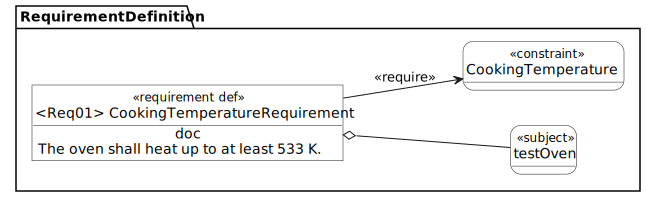

In [73]:
%viz --view=default --style=LR RequirementDefinition

- Note: This requirement assumes the oven is on
    - Assumption has to be true for constraint's predicate to be tested
    - This needs to be included as another constraint

### RevisitConstraints.sysml

In [74]:
package RevisitConstraints{
    private import SI::*;
    private import ScalarValues::Boolean;   // had to import bool value type

    package RevisedConstraintDef{
        part def Oven{
            attribute temperature: TemperatureDifferenceUnit;
            attribute isOn: Boolean;    // added attribute of on bool
        }
        
        constraint def OvenIsOn{    // added constraint OvenIsOn with logic statement
            testOven: Oven;
            testOven.isOn == true
        }

        constraint def CookingTemperature{
            testOven: Oven;
            testOven.temperature == 533 [K]
        }
    }
        
}

Package RevisitConstraints (76e0a75a-a942-46d6-a8ab-f6df577a7a18)


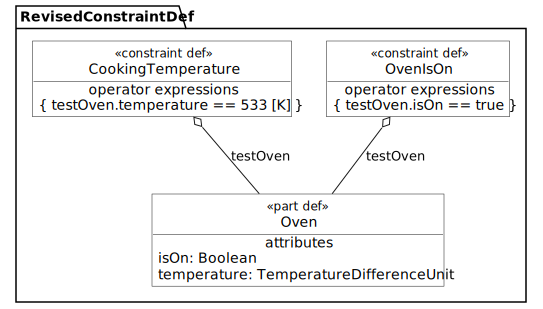

In [75]:
%viz --view=default RevisitConstraints::RevisedConstraintDef

### RevisitRequirementDefinition.sysml

In [76]:
package RevisitRequirementDefinition{
    private import RevisitConstraints::RevisedConstraintDef::*;

    requirement def <Req01> CookingTemperatureRequirement {
        doc
        /* Assuming the oven is on, 
        * The oven shall heat up to at least 533 K.
        */
        subject testOven: Oven;
        assume constraint OvenIsOn;
        require constraint CookingTemperature;
        // KEY WORD: `require`
        
    }
}

Package RevisitRequirementDefinition (423121d6-2816-4798-9e42-582c578a1f0b)


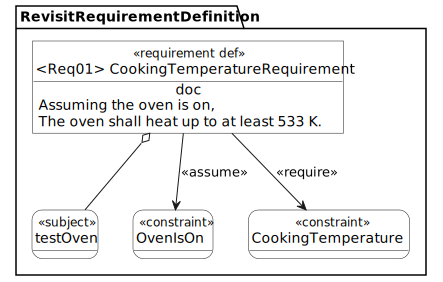

In [77]:
%viz --view=default RevisitRequirementDefinition

### ConstraintWithoutDefinition.sysml
It's possible to assign constraint predicates within the requirement definition itself instead of importing them as a package
- Will require importing definitions from library packages to define constraint predicates

In [78]:
package ConstraintWithoutDefinition{
    private import RevisitConstraints::RevisedConstraintDef::*;
    private import SI::K;

    requirement def <Req01> CookingTemperatureRequirement{
        doc
        /* Assuming the oven is on
        * The oven shall heat up to at least 533 K.
        */
        subject testOven: Oven;
        assume constraint { testOven.isOn == true }
        require constraint { testOven.temperature == 533 [K] }
    }
}

Package ConstraintWithoutDefinition (7a34ac07-9e00-4eb7-8353-dbb82d2d473f)


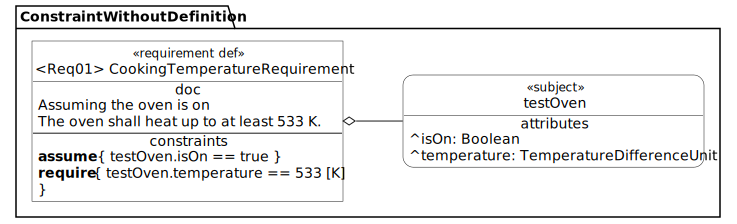

In [79]:
%viz --view=default --style=LR ConstraintWithoutDefinition

`^isOn` is an inherited parameter of the part definition Oven, denoted by the `^`

### StakeholderConcern.sysml
**Stakeholder**
- Role played by an entity (person, org, etc) having *concerns* related to the containing *requirement*
- Concerns precede requirements 
    - More abstraction > Specification
- Eg: Oven Concern
    - Stakeholder: Industry Consortium
        - Concerns: Heating efficiency, Safety standards
        - Resulting requirements: efficiency, safety

Concerns have same format as requirements except using keyword `concern`

In [80]:
package StakeholderConcern{
    private import SI::*;
    private import RevisitConstraints::RevisedConstraintDef::*;

    concern def SafetyConcern{  // Concern is defined as such
        subject oven: Oven;
        part def Person;

        stakeholder productDesigner: Person;    // This is the stakeholder raising concern

        attribute surfaceTemperature: TemperatureDifferenceUnit;

        // Concern expressed with `require` and documents a constraint that can be defined
        // and modeled further in req specification
        require constraint {
            doc /* The oven's external surface temperature shall not exceed 300 [K]*/
        }
    }
}

Package StakeholderConcern (094a6024-a405-41a7-8fad-34cef27dcb18)


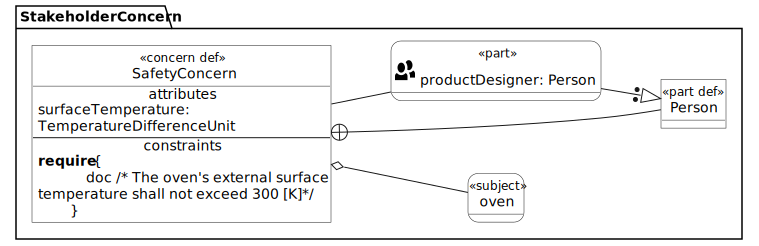

In [81]:
%viz --view=default --style=LR StakeholderConcern

### RequirementStakeholders.sysml
- Concern relates to the interests of a specific stakeholder
    - Difference in concerns is seen in form of views and viewpoints

**Viewpoint**
- Frames stakeholder concerns by offering different views

**View**
- Represents relevant pieces of a model

Note: Stakeholders are part usages and must be defined by part definitions

In [82]:
package RequirementStakeholders{
    private import RevisitConstraints::RevisedConstraintDef::*;

    part def ProductDesign;
    
    requirement def <Req01> CookingTemperatureRequirement{
        doc
        /* Assuming the oven is on
        * The oven shall heat up to at least 533 [K]
        */
        subject testOven: Oven;
        stakeholder productDesign: ProductDesign;
        assume constraint OvenIsOn;
        require constraint CookingTemperature;
    }
}

Package RequirementStakeholders (6d2e41a3-cb92-45b5-bd7a-8ab13b910e1c)


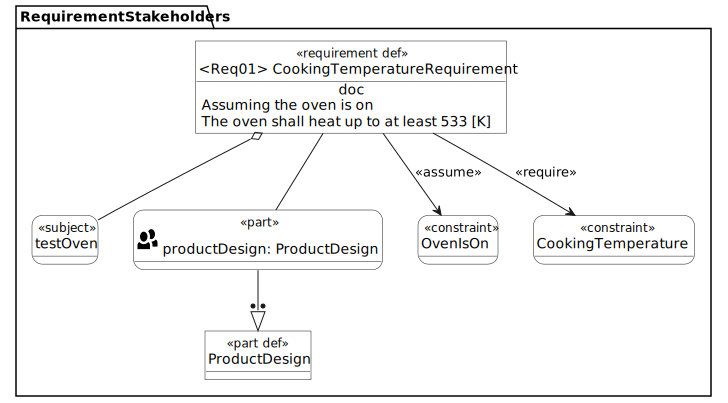

In [83]:
%viz --view=default RequirementStakeholders